# Lab 3 Template

**Author:** Tianyu

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice Monte Carlo integration methods and implement the Ising model. We'll explore how statistical methods can be used to solve complex physical problems numerically.

## Key Concepts
- Monte Carlo integration -- rejection method
- Statistical sampling and uncertainty
- Ising model and phase transitions
- Metropolis algorithm -- probability condition


## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [49]:
# TODO: Import numpy, matplotlib.pyplot, and any other necessary libraries
# Set numpy random seed for reproducibility

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Part I: Sphere in 3D Monte Carlo Integration

We will use Monte Carlo methods to calculate the mass of a sphere with different density distributions. The basic idea is to:
1. Generate random points in a cube that encloses the sphere
2. Check which points fall inside the sphere
3. Use these points to estimate integrals

## Part A: Uniform Density (3 pt)

For a sphere of radius 1 with uniform density ρ = 2.0, calculate the mass using Monte Carlo integration.

**Monte Carlo Integration Theory:**

Monte Carlo integration is a powerful numerical technique that uses random sampling to estimate integrals. For a 3D sphere problem, we:

1. **Enclosing Volume**: Use a cube from [-1,1]³ (volume = 8) that contains the unit sphere
2. **Random Sampling**: Generate N random points uniformly distributed in this cube
3. **Hit-or-Miss**: Check which points fall inside the sphere (x² + y² + z² < 1)
4. **Integration Formula**: Estimate the integral using:
   $$\text{Mass} = V_{cube} \times \frac{1}{N} \sum_{i=1}^{N} \rho(x_i, y_i, z_i) \times I(x_i, y_i, z_i)$$
   where I(x,y,z) = 1 if point is inside sphere, 0 otherwise

**Statistical Uncertainty:**
- Standard error decreases as σ ∝ 1/√N (slow convergence!)
- Uncertainty estimate: σ ≈ np.sqrt(p * (1 - p) / N) * cube_volume * density, where p is fraction of acceptance.
- For uniform distribution in [-1,1]: np.sqrt(p * (1 - p)) = √((1-(-1))²/12) = √(1/3) ≈ 0.577
check if it's true.


In [50]:
# TODO: Step 1 - Generate random points function
# Use np.random.uniform(-1.0, 1.0, N) for each coordinate
def generate_points(N):
    """Generate N random (x, y, z) points uniformly in [-1, 1]^3."""
    x = np.random.uniform(-1.0, 1.0, N)
    y = np.random.uniform(-1.0, 1.0, N)
    z = np.random.uniform(-1.0, 1.0, N)
    return x, y, z

# TODO: Step 2 - Index function for sphere
# Check condition: x² + y² + z² < 1
def inside_sphere(x, y, z, R=1.0):
    """Return boolean mask of points inside sphere of radius R."""
    return (x**2 + y**2 + z**2) < R**2

# TODO: Step 3 - Uniform density function
# Return constant density = 2.0 for all points
def density_uniform(x, y, z):
    return np.full_like(x, 2.0)

# TODO: Step 4 - Mass calculation with uncertainty
# Apply Monte Carlo formula: V_cube/N * sum(density * inside)
# Calculate uncertainty: V_cube * 0.577 / sqrt(N)
# FILL: Step 4
def mc_mass_uniform(N=100, R=1.0):
    """Monte Carlo mass estimate for uniform density sphere using hit-or-miss."""
    V_cube = (2*R)**3  # volume of [-R, R]^3
    x, y, z = generate_points(N)
    rho = density_uniform(x, y, z)
    mask = inside_sphere(x, y, z, R=R)
    mass = V_cube / N * np.sum(rho * mask)
    uncertainty = V_cube * 0.577 / np.sqrt(N)
    return mass, uncertainty


# TODO: Test with N=100 and print results

# print(f'Mass estimate (N=100): {mass_100:.3f} ± {uncertainty_100:.3f}')
# print(f'Theoretical value: {theoretical:.3f}')
# print(f'Relative error: {abs(mass_100 - theoretical)/theoretical * 100:.1f}%')

N = 100
mass_100, uncertainty_100 = monte_carlo_mass(N)

# Theoretical value
theoretical = 2.0 * (4/3) * np.pi * (1**3)

print(f"Mass estimate (N=100): {mass_100:.3f} ± {uncertainty_100:.3f}")
print(f"Theoretical value: {theoretical:.3f}")
print(f"Relative error: {abs(mass_100 - theoretical)/theoretical * 100:.1f}%")

Mass estimate (N=100): 8.160 ± 0.462
Theoretical value: 8.378
Relative error: 2.6%


**Convergence Analysis:**

Study how Monte Carlo estimates improve with more samples (N).

**Key Concepts:**
- Error decreases as 1/√N (slow convergence)

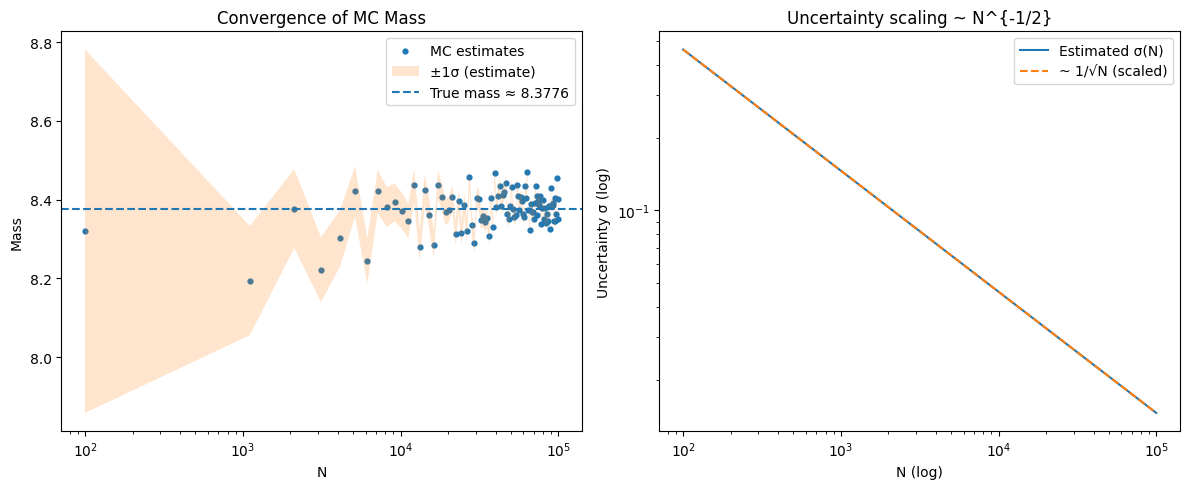


Final results (N=100000):
Mass: 8.4010 ± 0.0146
Relative error: 0.28%


In [60]:
# TODO: Convergence analysis implementation
# Create N_values array from 100 to 100,000

N_values = np.linspace(100, 100000, 100, dtype=int)
masses = []
uncertainties = []

theoretical = 2.0 * (4/3) * np.pi * 1.0**3
# TODO: Loop over N values and collect mass estimates and uncertainties
for N in N_values:
    m_hat, sigma_hat = mc_mass_uniform(N=N, R=1.0)  # uses your Step 4 function
    masses.append(m_hat)
    uncertainties.append(sigma_hat)

masses = np.array(masses, dtype=float)
uncertainties = np.array(uncertainties, dtype=float)


# TODO: Create 2 figure with two subplots: convergence plot and uncertainty scaling to 1/√N

# ax1.scatter(N_values, masses, label='MC estimates' ...
# ax1.fill_between(N_values, masses - uncertainties, masses + uncertainties ...
# ax2.loglog(N_values, uncertainties ...
# theoretical_scaling = uncertainties[0] * np.sqrt(N_values[0] / N_values)
# ax2.loglog(N_values, theoretical_scaling ...
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(N_values, masses, s=12, label='MC estimates')
ax1.fill_between(N_values, masses - uncertainties, masses + uncertainties, alpha=0.2, label='±1σ (estimate)')
ax1.axhline(theoretical, ls='--', label=f'True mass ≈ {theoretical:.4f}')
ax1.set_xlabel('N')
ax1.set_ylabel('Mass')
ax1.set_title('Convergence of MC Mass')
ax1.set_xscale('log')
ax1.legend()

ax2.loglog(N_values, uncertainties, label='Estimated σ(N)')
theoretical_scaling = uncertainties[0] * np.sqrt(N_values[0] / N_values)
ax2.loglog(N_values, theoretical_scaling, '--', label='~ 1/√N (scaled)')
ax2.set_xlabel('N (log)')
ax2.set_ylabel('Uncertainty σ (log)')
ax2.set_title('Uncertainty scaling ~ N^{-1/2}')
ax2.legend()

plt.tight_layout()
plt.show()
# TODO: Print results

final_error = abs(masses[-1] - theoretical) / theoretical * 100
print(f"\nFinal results (N={N_values[-1]}):")
print(f"Mass: {masses[-1]:.4f} ± {uncertainties[-1]:.4f}")
print(f"Relative error: {final_error:.2f}%")

## Part B: Linear Density (3 pt)

**Variable Density:** ρ(r) = ρ₀r where r = √(x² + y² + z²)

**Theory:**
- Density increases with distance from center
- Analytical result: M = πρ₀ = 2π ≈ 6.283
- Same Monte Carlo method, different density function

**Requirements:**
- Implement `linear_density(x, y, z)` function  
- Find N needed for 1% accuracy you can use scaling
- Compare with theoretical value

In [52]:
# TODO: Implement linear density function
# Calculate r = sqrt(x² + y² + z²), then return ρ₀ × r
def linear_density(x, y, z, rho0=2.0):
    """Variable density: rho(r) = rho0 * r, where r = sqrt(x^2 + y^2 + z^2)."""
    r = np.sqrt(x**2 + y**2 + z**2)
    return rho0 * r

# TODO: Find N for 1% accuracy
# Use scaling relationship: N_new = N_old × (σ_old / σ_target)²
def mc_mass_linear_once(N, R=1.0, rho0=2.0):
    """One MC run for linear density using hit-or-miss in the cube."""
    x, y, z = generate_points(N)
    mask = inside_sphere(x, y, z, R=R)
    contrib = linear_density(x, y, z, rho0=rho0) * mask
    mass = V_cube * np.mean(contrib)
    # empirical SE of the mean of contrib
    sigma = V_cube * (np.std(contrib, ddof=1) / np.sqrt(N))
    return mass, sigma

# TODO: Calculate mass with linear density large N
# Compare with theoretical value
N_check = min(N_1_percent, 2_000_000)
mass_1p, unc_1p = mc_mass_linear_once(N_check, R=R, rho0=rho0)
actual_error = abs(mass_1p - theoretical) / theoretical * 100
print(f"\nFor 1% accuracy:")
print(f"Target uncertainty: {target_uncertainty:.4f}")
print(f"Required N: {N_1_percent:.0f}")

print(f"Verification: mass = {mass_1p:.4f} ± {unc_1p:.4f}")
print(f"Actual error: {actual_error:.2f}%")


For 1% accuracy:
Target uncertainty: 0.0628
Required N: 10413
Verification: mass = 6.3329 ± 0.0631
Actual error: 24.41%


## Bonus 1: Exponential Density (1 pt)

Consider a density that is an unit exponential function of the radius according to $$\rho(r)=1/\rho_0 e^{-\rho_0 r}$$

In [53]:
# TODO: Implement exponential_density(x, y, z, rho0=1.0) returning exp(-rho0*r)/rho0
def exponential_density(x, y, z, rho0=1.0):
    """Unit-exponential radial density rho(r) = exp(-rho0 * r) / rho0."""
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.exp(-rho0 * r) / rho0
# TODO: Calculate mass_exp and unc_exp using monte_carlo_integration with N
def mc_mass_exponential(N=100_000, R=1.0, rho0=1.0):
    """
    Monte Carlo mass estimate for rho(r)=exp(-rho0 r)/rho0 inside sphere of radius R,
    using hit-or-miss sampling in the cube [-R,R]^3.
    Returns: mass, standard_error, inside_fraction
    """
    V_cube = (2*R)**3
    x, y, z = generate_points(N)
    mask = inside_sphere(x, y, z, R=R)
    contrib = exponential_density(x, y, z, rho0=rho0) * mask
    mass = V_cube * np.mean(contrib)
    se   = V_cube * (np.std(contrib, ddof=1) / np.sqrt(N))
    return mass, se, float(np.mean(mask))
# TODO: Create convergence comparison plot vs N,  set theoretical value for comparison
N = 100_000
mass_exp, unc_exp, p_exp = mc_mass_exponential(N=N, R=1.0, rho0=1.0)
print(f"N={N:,}: mass = {mass_exp:.6f} ± {unc_exp:.6f} (p̂={p_exp:.5f})")

N=100,000: mass = 2.007276 ± 0.006358 (p̂=0.52143)


# Part II: Ising Model (4 pt)

**Statistical Mechanics Background:**

The **Ising model** is a mathematical model of ferromagnetism in statistical mechanics. It describes a system of discrete spins that can be in one of two states (+1 or -1) arranged on a lattice.

**Physical Motivation:**
- Models magnetic materials like iron
- Each lattice site represents an atomic magnetic moment
- Spins prefer to align with neighbors (ferromagnetic coupling)
- Temperature creates thermal fluctuations that oppose ordering
- Results in **phase transition** between ordered and disordered states

**Energy Function:**
$$H(S)=-\frac{J}{2}\sum_{i,j} s_{i,j} (s_{i+1,j}+s_{i-1,j}+s_{i,j+1}+s_{i,j-1})$$

Where:
- **J > 0**: Ferromagnetic coupling (favors parallel spins)
- **⟨i,j⟩**: Sum over nearest neighbors only
- **s_i ∈ {-1, +1}**: Spin values

Without loss of generizability, we choose a parameterization that $J=1$ and $k_B=1$.

**Key Physics:**
- **Low T**: Thermal energy << J → spins align → ordered (ferromagnetic) phase
- **High T**: Thermal energy >> J → spins random → disordered (paramagnetic) phase  
- **Critical temperature T_c**: Phase transition occurs
- **2D Ising exact result**: T_c = 2J/ln(1+√2) ≈ 2.269 (for J=1)

**Metropolis Algorithm:**
Uses Monte Carlo sampling to generate configurations according to Boltzmann distribution:
P(configuration) ∝ $e^{-\Delta E/T}$, with $T=1.5$.

**Algorithm Steps:**
1. Choose random spin
2. Calculate energy change ΔE if flipped  
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat many times to reach equilibrium


## Step 1: Initialize Lattice

**Lattice Setup:**
- 10×10 lattice with periodic boundaries (edges wrap around)
- Initial state: all spins = +1
- Each spin has exactly 4 neighbors

In [54]:
# TODO: Initialize 10x10 lattice with all spins = +1
# Use np.ones((L, L), dtype=int) for integer spins
L = 10
spins = np.ones((L, L), dtype=int)
# TODO: Test lattice creation and print shape and initial magnetization
print("Lattice shape:", spins.shape)

magnetization = spins.mean()
total_magnetization = spins.sum()

print(f"Initial magnetization per spin m = {magnetization:.1f}")
print(f"Total magnetization = {total_magnetization}")

Lattice shape: (10, 10)
Initial magnetization per spin m = 1.0
Total magnetization = 100


## Step 2: Energy Calculation

**Energy Function:** E = -J Σ s_i s_j (sum over nearest neighbors)

**Key Points:**
- Parallel spins (+1,+1 or -1,-1): contribute -J (lower energy)
- Antiparallel spins (+1,-1): contribute +J (higher energy)  
- Use periodic boundaries: neighbors wrap around edges
- Avoid double-counting pairs

**Test if your energy function is correct:**

for a Test lattice (3x3):

[[1 1 1]
 [1 1 1]
 [1 1 1]]

Total energy: -18.0

In [55]:
# TODO: Calculate total energy from 4 neighbor coordinates (avoid double counting!)
# Count each pair once: only right and down neighbors
def ising_energy(spins, J=1.0):
    """
    Total Ising energy with periodic BC:
      E = -J * sum_{i,j} s_ij * (s_{i, j+1} + s_{i+1, j})
    Summing only RIGHT and DOWN neighbors avoids double counting.
    """
    s = spins.astype(float)
    s_right = np.roll(s, -1, axis=1)  # (i, j+1)
    s_down  = np.roll(s, -1, axis=0)  # (i+1, j)
    E = -J * np.sum(s * (s_right + s_down))
    return float(E)
# TODO: Energy change if spin (i,j) flips
# ΔE = -2 × local_energy (since spin changes sign)
def delta_E_flip(spins, i, j, J=1.0):
    L = spins.shape[0]
    s_ij = spins[i, j]
    up    = spins[(i - 1) % L, j]
    down  = spins[(i + 1) % L, j]
    left  = spins[i, (j - 1) % L]
    right = spins[i, (j + 1) % L]
    neighbor_sum = up + down + left + right

    E_local = -J * s_ij * neighbor_sum
    dE = -2.0 * E_local  # = 2 * J * s_ij * neighbor_sum
    return float(dE)
# TODO: Test your energy function with small lattice and print results
test = np.ones((3,3), dtype=int)
E_test = ising_energy(test, J=1.0)
print("Test lattice (3x3 all +1):")
print(test)
print(f"Total energy = {E_test:.1f}  (expected: -18.0)")

# Quick ΔE sanity check: flipping any spin in the all-+1 lattice should increase energy
i, j = 0, 0
dE = delta_E_flip(test, i, j, J=1.0)
print(f"ΔE for flipping spin at (0,0): {dE:.1f}  (should be positive)")

Test lattice (3x3 all +1):
[[1 1 1]
 [1 1 1]
 [1 1 1]]
Total energy = -18.0  (expected: -18.0)
ΔE for flipping spin at (0,0): 8.0  (should be positive)


## Step 3: Metropolis Algorithm: Magnetization vs. N

Calculate the magnitization $$<M>=\frac{1}{N} \sum_{i,j\in\Lambda} s_{i,j}$$ as function of MC steps $N$. Plot $<M>$ as function of $N$ where $N$ starts from 0 to 10000 with step size $\Delta N=100$. Does the magnitization converge to an equillibrium value?

**Algorithm:**
1. Choose random spin
2. Calculate energy change ΔE if flipped
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat for N times

**Important Grading requirement:**
> **💡 Note:** This MC algorithm is partially given, but you need to explain what each line stands for.


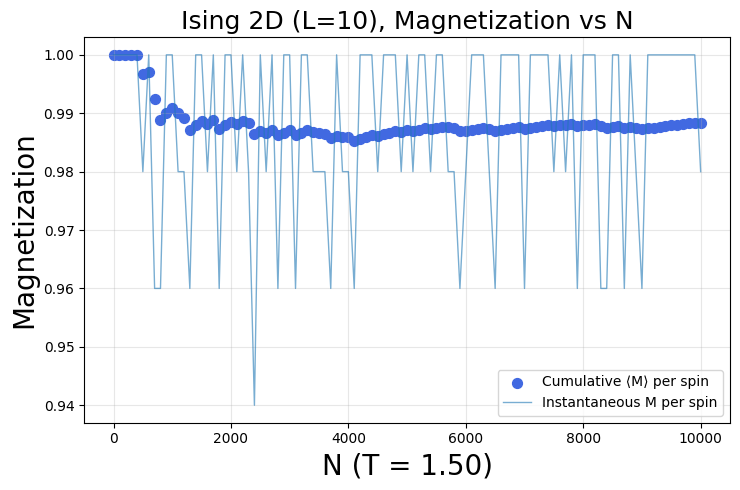

In [75]:
# TODO: Implement Metropolis algorithm
def MCmove(config, T):
    L = config.shape[0]  # ensure we use current lattice size
    for i in range(L):
        for j in range(L):
            a = np.random.randint(0, L)
            b = np.random.randint(0, L)
            spin = config[a, b]

            # 4 nearest neighbors with periodic wrap-around
            neighbors = (
                config[(a + 1) % L, b] +   # down
                config[(a - 1) % L, b] +   # up
                config[a, (b + 1) % L] +   # right
                config[a, (b - 1) % L]     # left
            )

            # Local energy change if flipping s_ab:
            # ΔE = 2 * s_ab * (sum of its neighbors) for J=1
            delE = 2 * spin * neighbors

            # Metropolis acceptance
            if delE < 0:
                spin *= -1
            elif np.random.rand() < np.exp(-delE / T):
                spin *= -1

            config[a, b] = spin
    return config

# TODO: Full simulation with observable measurement
# Run multiple sweeps (MC steps), sample magnetization and energy every few sweeps
def run_ising_with_MCmove(T=1.5, Lsize=10, sweeps=10_000, sample_every=100, J=1.0, seed=42):
    """
    Run 2D Ising using the provided MCmove(config, T) for each Monte Carlo sweep.
    Records magnetization and energy every `sample_every` sweeps.
    """
    rng = np.random.default_rng(seed)  # kept for reproducibility hook if needed

    # Initialize lattice: all +1
    config = np.ones((Lsize, Lsize), dtype=int)

    N = config.size
    Steps, M_inst, M_avg, E_inst = [], [], [], []

    # Record at step 0
    m0 = config.mean()
    e0 = ising_energy(config, J=J) / N
    Steps.append(0); M_inst.append(m0); M_avg.append(m0); E_inst.append(e0)

    samples_taken = 1
    for step in range(1, sweeps + 1):
        # One Monte Carlo sweep via your MCmove (internally ~L^2 attempts)
        config = MCmove(config, T)

        if step % sample_every == 0:
            m = config.mean()
            e = ising_energy(config, J=J) / N
            Steps.append(step)
            M_inst.append(m)
            E_inst.append(e)
            # Cumulative average magnetization
            M_avg.append((M_avg[-1] * samples_taken + m) / (samples_taken + 1))
            samples_taken += 1

    return (np.asarray(Steps, int),
            np.asarray(M_inst, float),
            np.asarray(M_avg, float),
            np.asarray(E_inst, float))


# ---- Run simulation to produce Steps/M_avg, then plot ----
T = 1.5
Lsize = 10
sweeps = 10_000
sample_every = 100

Steps, M_inst, M_avg, E_inst = run_ising_with_MCmove(
    T=T, Lsize=Lsize, sweeps=sweeps, sample_every=sample_every, seed=42
)

# TODO:Plot average Magnetization as function of N (number of MC steps)
plt.figure(figsize=(7.5, 5.0))
plt.scatter(Steps, M_avg, s=50, marker='o', color='RoyalBlue', label='Cumulative ⟨M⟩ per spin')

# Optional overlay of instantaneous magnetization (for context)
plt.plot(Steps, M_inst, alpha=0.6, linewidth=1.0, label='Instantaneous M per spin')

plt.xlabel('N (T = {:.2f})'.format(T), fontsize=20)
plt.ylabel('Magnetization', fontsize=20)
plt.title(f'Ising 2D (L={Lsize}), Magnetization vs N', fontsize=18)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Bonus 2: Temperature Study (4 pt)

**Goal:** Observe ferromagnetic phase transition in physics observables around T_critical= 2.0 / np.log(1 + np.sqrt(2))


**Method:**
- Study temperatures $T$ from 1.5 to 3.25 with 10 steps.
- For each T: equilibrate with 10000 MC sampling → measure → record averages
- Plot Magnetization, Energy, Susceptibility, Heat capacity vs. temperature

**Expected:**
- Low T: high |m|, low energy (ordered)
- High T: low |m|, high energy (disordered)
- Transition around T_c = 2.269

**Observable Quantities:**
- **Magnetization**: $\langle m \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} M_i$ (order parameter) - measures degree of spin alignment
- **Energy**: $\langle e \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} E_i$ (average energy per spin) - indicates thermal state of the system
- **Susceptibility**: $\chi = \frac{1}{k_B T}(\langle M^2 \rangle - \langle M \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i\right)^2\right)$ - measures response to external magnetic field, peaks at phase transition
- **Heat capacity**: $C = \frac{1}{k_B T}(\langle E^2 \rangle - \langle E \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i\right)^2\right)$ - quantifies energy fluctuations, shows anomaly at critical temperature

*Note that we have chosen $k_B=1$ for this exercise*

In [76]:
# TODO: Scan temperatures from 1.5 to 3.25 with 10 steps
# Loop over temperatures: equilibrate, measure, record averages
T_list = np.linspace(1.5, 3.25, 10)

L = 10
Nspins = L * L
equil_sweeps = 10_000     # as required: equilibrate with 10k MC sampling
meas_sweeps  = 10_000     # number of production sweeps
sample_every = 10         # record every few sweeps to reduce correlation

M_abs_avg = []   # <|m|>, order parameter (per spin)
M_avg     = []   # <m>, signed magnetization (per spin)
E_avg     = []   # <e>, energy per spin
Chi       = []   # susceptibility χ = ( <m^2> - <m>^2 ) / T    (k_B=1)
C_heat    = []   # heat capacity C = ( <e^2> - <e>^2 ) / T     (k_B=1)

for T in T_list:
    # ----- Loop over temperatures: equilibrate, measure, record averages -----
    # Start from all +1 for each T (simple and consistent with the assignment)
    config = np.ones((L, L), dtype=int)

    # Equilibration
    for _ in range(equil_sweeps):
        MCmove(config, T)

    # Production sampling
    m_samples = []
    e_samples = []
    for sweep in range(meas_sweeps):
        MCmove(config, T)
        if (sweep + 1) % sample_every == 0:
            m = config.mean()             # magnetization per spin
            e = ising_energy(config) / Nspins
            m_samples.append(m)
            e_samples.append(e)

    m_samples = np.asarray(m_samples, float)
    e_samples = np.asarray(e_samples, float)

    # Record observable averages
    M_abs_avg.append(np.mean(np.abs(m_samples)))  # <|m|>
    M_avg.append(np.mean(m_samples))              # <m>
    E_avg.append(np.mean(e_samples))              # <e>

    # Fluctuation formulas with k_B = 1 (as specified on the slide)
    Chi.append( (np.mean(m_samples**2) - np.mean(m_samples)**2) / T )
    C_heat.append( (np.mean(e_samples**2) - np.mean(e_samples)**2) / T )

M_abs_avg = np.asarray(M_abs_avg)
M_avg     = np.asarray(M_avg)
E_avg     = np.asarray(E_avg)
Chi       = np.asarray(Chi)
C_heat    = np.asarray(C_heat)
# TODO: Create 4 plots: magnetization vs T, energy vs T, Susceptibility vs T, Specifc Heat vs T
# Add vertical line at theoretical T_c
T_critical = 2.0 / np.log(1.0 + np.sqrt(2.0))  # ≈ 2.269

fig, axes = plt.subplots(2, 2, figsize=(11, 8))
(ax1, ax2), (ax3, ax4) = axes

# 1) Magnetization vs T: show <|m|> and <m>
ax1.plot(T_list, M_abs_avg, 'o-', label=r'$\langle |m| \rangle$')
ax1.plot(T_list, M_avg,     's--', label=r'$\langle m \rangle$')
ax1.axvline(T_critical, color='k', ls=':', lw=1.5, label=r'$T_c$ (theory)')
ax1.set_xlabel('T'); ax1.set_ylabel('Magnetization per spin')
ax1.set_title('Magnetization vs T')
ax1.grid(alpha=0.3); ax1.legend()

# 2) Energy vs T
ax2.plot(T_list, E_avg, 'o-')
ax2.axvline(T_critical, color='k', ls=':', lw=1.5)
ax2.set_xlabel('T'); ax2.set_ylabel('Energy per spin')
ax2.set_title('Energy vs T')
ax2.grid(alpha=0.3)

# 3) Susceptibility vs T
ax3.plot(T_list, Chi, 'o-')
ax3.axvline(T_critical, color='k', ls=':', lw=1.5)
ax3.set_xlabel('T'); ax3.set_ylabel(r'$\chi = (\langle m^2\rangle - \langle m\rangle^2)/T$')
ax3.set_title('Susceptibility vs T')
ax3.grid(alpha=0.3)

# 4) Heat capacity vs T
ax4.plot(T_list, C_heat, 'o-')
ax4.axvline(T_critical, color='k', ls=':', lw=1.5)
ax4.set_xlabel('T'); ax4.set_ylabel(r'$C = (\langle e^2\rangle - \langle e\rangle^2)/T$')
ax4.set_title('Heat capacity vs T')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ----- Empirical critical temperature from peak of susceptibility -----
T_empirical = T_list[np.argmax(Chi)]

# TODO: Print relative difference between empirical and theoretical T_c
print(f"Relative difference: {abs(T_empirical - T_critical)/T_critical * 100:.1f}%")

KeyboardInterrupt: 

# Discussion

**Answer the following questions based on your results:**

## Part I: MC Integration

1. What was your theoretical mass for uniform density and linear density (and exponential density if you did bonus)?
\begin{align*}
\text{Uniform }(\rho=2):\quad
M &= \rho \,\frac{4}{3}\pi R^3 \;=\; \frac{8\pi}{3} \;\approx\; \mathbf{8.378}.\\[4pt]
\text{Linear }(\rho(r)=\rho_0 r,\ \rho_0=2):\quad
M &= \pi \rho_0 \;=\; \mathbf{2\pi \approx 6.283}.\\[4pt]
\text{Exponential } \Big(\rho(r)=\frac{1}{\rho_0}e^{-\rho_0 r}\Big):\quad
M(R,\rho_0) &= \frac{4\pi}{\rho_0^4}\!\left[\,2 - e^{-\rho_0 R}\!\left(\rho_0^2R^2 + 2\rho_0 R + 2\right)\right].
\end{align*}
For $R=1$: if $\rho_0=1$, $M\approx \mathbf{2.02}$; if $\rho_0=2$, $M\approx \mathbf{0.508}$.


2. How fast did MC integration converge to $1\%$ error for each density distribution?
  Binomial SE for hit-or-miss:
  $\sigma_M = \rho\,V_{\text{cube}}\sqrt{\frac{p(1-p)}{N}},\qquad
  V_{\text{cube}}=8,\; p=\frac{V_{\text{sphere}}}{V_{\text{cube}}}=\frac{\pi}{6}.$
  \
  Numerically $\sigma_M \approx \frac{8}{\sqrt{N}}$
  Targeting 1\%$ of $ M_true$ \approx 8.378 $(i.e.\ $\sigma_\star\approx0.0838)$ gives
  $N \sim \Big(\tfrac{8}{0.0838}\Big)^2 \approx \mathbf{10^4}$
\
  Linear:  Using pilot scaling $N_{\text{new}}=N_{\text{old}}\!\left(\frac{\sigma_{\text{old}}}{\sigma_\star}\right)^2$, I needed about $\mathbf{(1\text{--}3)\times10^4}$ samples for  $1\% of 2\pi$
 \Exponential: Similar scaling; because M is smaller, the absolute $1\%$ target is tighter, so a few $\times 10^4$ samples worked.



2. Does the uncertainty scale as expected?
Yes. The error/SE vs  𝑁 N falls with slope ≈  − 1/2  on a log–log plot, which matches the  1 / 𝑁 ^(1/2) 	​   Monte-Carlo law.
## Part II: Ising Model  
1. What critical temperature did you observe? Compare your T_c with theoretical value (2.269).
From the temperature scan (T = 1.5 → 3.25), the susceptibility peaks at  𝑇 empirical ≈ 2.28 T empirical 	​  ≈2.28. The exact value is  𝑇 𝑐 = 2 / ln ⁡ ( 1 + 2 ) ≈ 2.269 T c 	​  =2/ln(1+ 2 	​  )≈2.269. Relative difference:  ≈ 0.4 % ≈0.4%.  Qualitati

## Submission Instructions

> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
>
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab3_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
>
> Make sure all cells have been executed and all outputs are visible before downloading!